# Worksheet 10 - Clustering

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe a case where clustering would be an appropriate tool, and what insight it would bring from the data.
* Explain the k-means clustering algorithm.
* Interpret the output of a k-means cluster analysis.
* Perform k-means clustering in R using k-means
* Visualize the output of k-means clustering in R using a coloured scatter plot
* Identify when it is necessary to scale variables before clustering and do this using R
* Use the elbow method to choose the number of clusters for k-means
* Describe advantages, limitations and assumptions of the kmeans clustering algorithm.


In [1]:
### Run this cell before continuing.
library(tidyverse)
library(forcats)
library(repr)
library(broom)
source('tests_worksheet_10.R')
source("cleanup_worksheet_10.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




**Question 0.0** Multiple Choice:
<br> {points: 1}

In which of the following scenarios would clustering methods likely be appropriate?

A. Identifying sub-groups of houses according to their house type, value, and geographical location

B. Predicting whether a given user will click on an ad on a website

C. Segmenting customers based on their preferences to target advertising

D. Both A. and B.

E. Both A. and C. 

*Assign your answer to an object called `answer0.0`. Your answer should be a single upper-case character surrounded by quotes.*

In [2]:
# your code here
answer0.0 = 'E'

In [3]:
test_0.0()

[1] "Success!"


**Question 0.1** Multiple Choice:
<br> {points: 1}

Which step in the description of the Kmeans algorithm below is incorrect?

0. Choose the number of clusters

1. Randomly assign each of the points to one of the clusters

2. Calculate the position for the cluster centre (centroid) for each of the clusters (this is the middle of the points in the cluster, as measured by straight-line distance)

3. Re-assign each of the points to the cluster who's centroid is furthest from that point

4. Repeat steps 1 - 2 until the cluster centroids don't change very much between iterations

*Assign your answer to an object called `answer0.1`. Your answer should be a single numerical character surrounded by quotes.*

In [4]:
# your code here
answer0.1 = '3'

In [5]:
test_0.1()

[1] "Success!"


## Hoppy Craft Beer

Craft beer is a strong market in Canada and the US, and is expanding to other countries as well. If you wanted to get into the craft beer brewing market, you might want to better understand the product landscape. One popular craft beer product is hopped craft beer. Breweries create/label many different kinds of hopped craft beer, but how many different kinds of hopped craft beer are there really when you look at the chemical properties instead of the human labels? 

We will start to look at the question by looking at a [craft beer data set from Kaggle](https://www.kaggle.com/nickhould/craft-cans#beers.csv). In this data set, we will use the alcoholic content by volume  (`abv` column) and the International bittering units (`ibu` column) as variables to try to cluster the beers.

**Question 1.0** 
<br> {points: 1}

Read in the `beers.csv` data and assign it to an object called `beer`. The data is located within the `worksheet_10/data/` folder. 

*Assign your dataframe answer to an object called `beer`.*

In [6]:
# your code here
beer = read_csv('data/beers.csv')
head(beer)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  abv = col_double(),
  ibu = col_double(),
  id = col_double(),
  name = col_character(),
  style = col_character(),
  brewery_id = col_double(),
  ounces = col_double()
)



X1,abv,ibu,id,name,style,brewery_id,ounces
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
0,0.050,NA,1436,Pub Beer,American Pale Lager,408,12
1,0.066,NA,2265,Devil's Cup,American Pale Ale (APA),177,12
2,0.071,NA,2264,Rise of the Phoenix,American IPA,177,12
3,0.090,NA,2263,Sinister,American Double / Imperial IPA,177,12
4,0.075,NA,2262,Sex and Candy,American IPA,177,12
5,0.077,NA,2261,Black Exodus,Oatmeal Stout,177,12


In [7]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br> {points: 1}

Let's start by visualizing the variables we are going to use in our cluster analysis as a scatter plot. Put `ibu` on the horizontal axis, and `abv` on the vertical axis. Name the plot object `beer_eda`. 

*Remember to follow the best visualization practices, including adding human-readable labels to your plot.*

Warning message:
“Removed 1005 rows containing missing values (geom_point).”


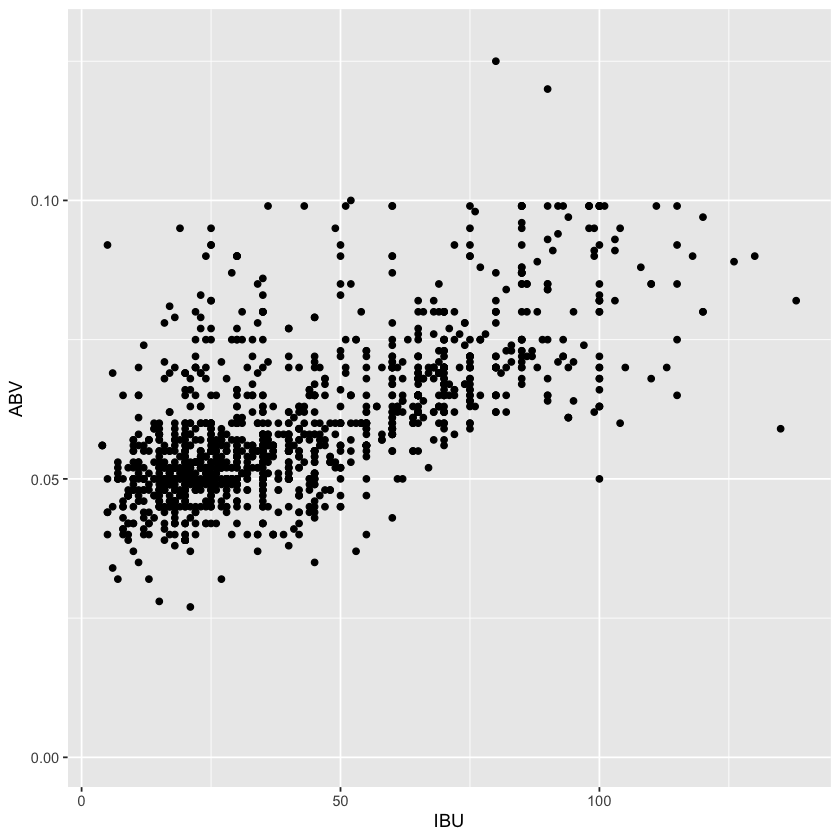

In [8]:
# your code here
beer_eda = beer %>%
    ggplot(aes(x=ibu, y=abv)) +
    geom_point() +
    labs(x="IBU", y="ABV")
beer_eda

In [9]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br> {points: 1}

We need to clean this data a bit. Specifically, we need to remove the rows where `ibu` is `NA`, and select only the columns we are interested in clustering, which are `ibu` and `abv`. 

*Assign your answer to an object named `clean_beer`.*

In [10]:
# your code here
clean_beer = beer %>%
    filter(ibu != "NA") %>%
    select(ibu, abv)
head(clean_beer)

ibu,abv
<dbl>,<dbl>
60,0.061
92,0.099
45,0.079
42,0.044
17,0.049
17,0.049


In [11]:
test_1.2()

[1] "Success!"


**Question 1.3.1**
<br>{points: 1}

Why do we need to scale the variables when using k-means clustering?

A. k-means uses the Euclidean distance to compute how similar data points are to each cluster centre

B. k-means is an iterative algorithm

C. Some variables might be more important for prediction than others

D. To make sure their mean is 0

*Assign your answer to an object named `answer1.3.1`. Make sure your answer is a single upper-case character surrounded by quotes.*

In [12]:
# your code here
answer1.3.1 = 'A'

In [13]:
test_1.3.1()

[1] "Success!"


**Question 1.3.2**
<br> {points: 1}

Let's do that scaling now. Recall that we used the `preProcess` function for scaling when doing classification and regression. This is because we needed to be able to split train and test data, compute a standardization on *just* training data, and apply the standardization to *both* train and test data.

But in clustering, there is no train/test split. So let's use the much simpler `scale` function in R. `scale` takes in a column of a dataframe and outputs the standardized version of it. We can therefore apply `scale` to all variables in the cleaned data frame using the `map_df` function.

*Assign your answer to an object named `scaled_beer`. Use the scaffolding provided.*

In [14]:
# ... <- ... %>% 
#    map_df(...)

# your code here
scaled_beer <- clean_beer %>% 
   map_df(~ scale(.))
head(scaled_beer)

ibu,abv
<dbl>,<dbl>
0.66605490,0.08000109
1.89900237,2.87899086
0.08811077,1.40583835
-0.02747806,-1.17217854
-0.99071827,-0.80389041
-0.99071827,-0.80389041


In [15]:
test_1.3.2()

[1] "Success!"


**Question 1.4**
<br> {points: 1}

From our exploratory data visualization, 2 seems like a reasonable number of clusters. Use the `kmeans` function with `centers = 2` to perform clustering with this choice of K. 

*Assign your model to an object named `beer_cluster_k2`. Note that since k-means uses a random initialization, we need to set the seed again; don't change the value!*

In [16]:
# DON'T CHANGE THE SEED VALUE!
set.seed(1234)

# ... <- kmeans(..., centers = 2)
# your code here
beer_cluster_k2 <- kmeans(scaled_beer, centers = 2)
beer_cluster_k2

K-means clustering with 2 clusters of sizes 917, 488

Cluster means:
         ibu        abv
1 -0.5830271 -0.5506271
2  1.0955653  1.0346824

Clustering vector:
   [1] 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 1 2
  [38] 1 2 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2
  [75] 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 2
 [112] 2 1 1 2 2 1 2 2 1 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 2 2 2
 [149] 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 1 1 1 2 1 1
 [186] 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 [223] 1 1 1 1 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1
 [260] 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1
 [297] 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 1 1 2
 [334] 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 1 1 2 1 1 1 1 2
 [371] 1 2 1 1 1 1 2 1 2 2 1 

In [17]:
test_1.4()

[1] "Success!"


**Question 1.5**
<br> {points: 1}

Use the `augment` function from the `broom` package to get the cluster assignment for each point in the `scaled_beer` data frame. 

*Assign your answer to an object named `tidy_beer_cluster_k2`.* 

In [34]:
# ... <- augment(..., ...)
# your code here
tidy_beer_cluster_k2 <- augment(beer_cluster_k2, scaled_beer)
head(tidy_beer_cluster_k2)

ibu,abv,.cluster
<dbl>,<dbl>,<fct>
0.66605490,0.08000109,2
1.89900237,2.87899086,2
0.08811077,1.40583835,2
-0.02747806,-1.17217854,1
-0.99071827,-0.80389041,1
-0.99071827,-0.80389041,1


In [19]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 1}

Create a scatter plot of `abv` on the y-axis versus `ibu` on the x-axis (using the data in `tidy_beer_cluster_k2`) where the points are labelled by their cluster assignment. Name the plot object `tidy_beer_cluster_k2_plot`.

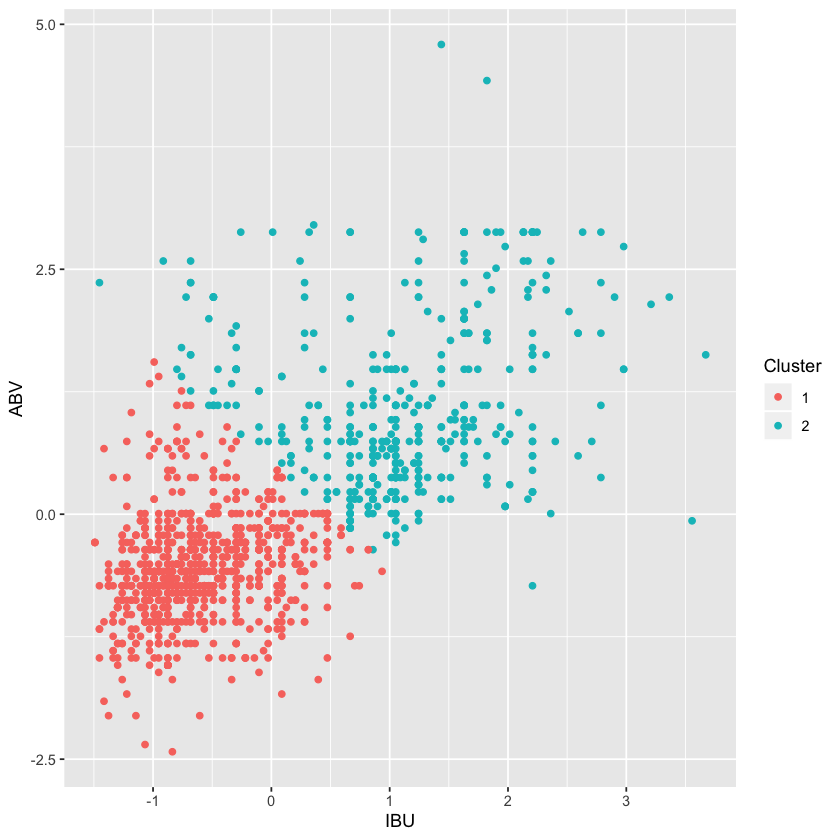

In [25]:
# your code here
tidy_beer_cluster_k2_plot = tidy_beer_cluster_k2 %>%
    ggplot(aes(x=ibu, y=abv, color=.cluster)) +
    geom_point() +
    labs(x="IBU", y="ABV", color="Cluster")
tidy_beer_cluster_k2_plot

In [26]:
test_1.6()

[1] "Success!"


**Question 1.7.1** Multiple Choice:
<br> {points: 1}

We do not know, however, that two clusters (K = 2) is the best choice for this data set. What can we do to choose the best K?

A. Perform *cross-validation* for a variety of possible Ks. Choose the one where within-cluster sum of squares distance starts to *decrease less*.

B. Perform *cross-validation* for a variety of possible Ks. Choose the one where the within-cluster sum of squares distance starts to *decrease more*. 

C. Perform *clustering* for a variety of possible Ks. Choose the one where within-cluster sum of squares distance starts to *decrease less*.

D. Perform *clustering* for a variety of possible Ks. Choose the one where the within-cluster sum of squares distance starts to *decrease more*. 

*Assign your answer to an object called `answer1.7.1`. Make sure it is a single upper-case character surrounded by quotes.*

In [27]:
# your code here
answer1.7.1 = 'C'

In [28]:
test_1.7.1()

[1] "Success!"


**Question 1.7.2**
<br> {points: 1}

Use the `glance` function from the `broom` library to get the model-level statistics for the clustering we just performed, including total within-cluster sum of squares. 

*Assign your answer to an object named `beer_cluster_k2_model_stats`.*

**Note: Do not pass `tidy_beer_cluster_k2` into the `glance` function. This will cause the R kernel to crash.** 

In [35]:
# your code here
beer_cluster_k2_model_stats = glance(beer_cluster_k2)
beer_cluster_k2_model_stats

totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<int>
2808,1110.102,1697.898,1


In [36]:
test_1.7.2()

[1] "Success!"


**Question 1.8**
<br> {points: 1}

Let's now choose the best K for this clustering problem. To do this we need to create a data frame (or a tibble, this time it doesn't matter) with a column named `k`, where we vary K from 1 to 10. 

*Assign your answer to an object named `beer_ks`.*

In [40]:
# your code here
beer_ks = data.frame(k = seq(from=1, to=10, by=1))
beer_ks

k
<dbl>
1
2
3
4
5
6
7
8
9


In [41]:
test_1.8()

[1] "Success!"


**Question 1.9**
<br> {points: 1}

Next we use `mutate` to create a new column named `models`, where we use `map` to apply the `kmeans` function to our `scaled_beer` data set for each of the K's.

*Assign your answer to an object named `beer_clustering`.*

In [48]:
# ... <- ... %>%
    # mutate(models = map(k, ~kmeans(..., .x)))

# your code here
beer_clustering <- beer_ks %>%
    mutate(models = map(k, ~kmeans(scaled_beer, centers=.)))
glimpse(beer_clustering)

Observations: 10
Variables: 2
$ k      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ models <list> [<1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…


In [49]:
test_1.9()

[1] "Success!"


**Question 2.0**
<br> {points: 1}

Next we use `mutate` again to create a new column called `model_statistics` where we use `map` to apply the `glance` function to each of our models (in the `models` column) to get the model-level statistics (this is where we can get the value for total within sum of squares that we use to choose K).

*Assign your answer to an object named `beer_model_stats`.*

In [50]:
# ... <- ... %>% 
    # mutate(... = map(models, ...))

# your code here
beer_model_stats <- beer_clustering %>% 
    mutate(model_statistics = map(models, ~glance(.)))
glimpse(beer_model_stats)

Observations: 10
Variables: 3
$ k                <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ models           <list> [<1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ model_statistics <list> [<tbl_df[1 x 4]>, <tbl_df[1 x 4]>, <tbl_df[1 x 4]>,…


In [51]:
test_2.0()

[1] "Success!"


**Question 2.1**
<br> {points: 1}

Now we use the `unnest` function to expand the data frames in the `model_statistics` column so that we can access the values for total within sum of squares as a column. 

*Assign your answer to an object named `beer_clustering_unnested`.*

In [52]:
# ... <- ... %>% unnest(model_statistics)
# your code here
beer_clustering_unnested <- beer_model_stats %>% 
    unnest(model_statistics)
glimpse(beer_clustering_unnested)

Observations: 10
Variables: 6
$ k            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ models       <list> [<1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ totss        <dbl> 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 2808, 28…
$ tot.withinss <dbl> 2808.0000, 1110.0270, 807.9575, 623.8451, 474.1708, 411.…
$ betweenss    <dbl> -2.273737e-12, 1.697973e+03, 2.000043e+03, 2.184155e+03,…
$ iter         <int> 1, 1, 4, 3, 3, 4, 4, 5, 3, 4


In [53]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br> {points: 1}

We now have the the values for total within-cluster sum of squares for each model in a column (`tot.withinss`). Let's use it to create a line plot of total within-cluster sum of squares versus k, so that we can choose the best number of clusters to use. 

*Assign your plot to an object called `choose_beer_k`. Total within-cluster sum of squares should be on the y-axis and K should be on the x-axis. Remember to follow the best visualization practices, including adding human-readable labels to your plot.*

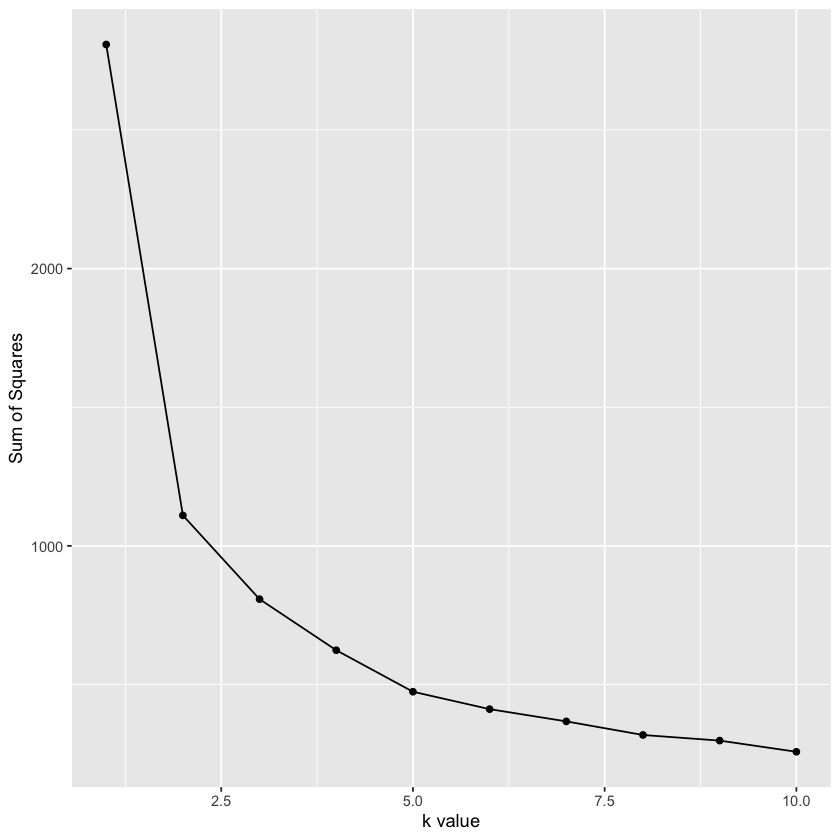

In [57]:
# your code here
choose_beer_k = beer_clustering_unnested %>%
    ggplot(aes(x=k, y=tot.withinss)) +
    geom_line() + geom_point() +
    labs(x="k value", y="Sum of Squares")
choose_beer_k

In [58]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

From the plot above, which K should we choose? 

*Assign your answer to an object called `answer2.3`. Make sure your answer is a single numerical character surrounded by quotation marks.*

In [69]:
# your code here
answer2.3='3'

In [70]:
test_2.3()

[1] "Success!"


**Question 2.4**
<br> (optional - not graded)

In your own words, explain why we chose the K we chose above.

Response:

It's hard to visually depict this (perhaps there is an easier way?) but it seems that it was the last point before the slope became less than 1.

**Question 2.5**
<br> (optional - not graded)

What can we conclude from our analysis? How many different types of hoppy craft beer are there in this data set using the two variables we have? Do you think our analysis might change if we added additional variables? Why/why not?


DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 2.6** 
<br> (optional - not graded)

Visually verify that 2 clusters is the "best" choice for K for this analysis. Do this by plotting the cluster assignments for the points for each K (each should be its own scatter plot).

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.